# Natural Language Processing - Public Opinion on Climate Change 

## Data Pre-processing 

### Description of Dataset

The dataset contains reddit comments related to discussions on climate change. According to Kaggle the dataset: "provides valuable insights into public opinions and discussions surrounding climate change" due the diverse nature of the communities and discussion on Reddit. 

Data Source: https://www.kaggle.com/datasets/asaniczka/public-opinion-on-climate-change-updated-daily

The aim of the following project is to analyze overall sentiment towards climate change topics on Reddit over time and use natural language processing techniques to identify key topics and themes within climate change discussions.

### Import of Dataset and relevant libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

import nltk
# Download the stopwords data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

import missingno as msno

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/claudia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/claudia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/claudia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_original = pd.read_csv('../data/reddit_opinion_climate_change.csv')
df = df_original.copy()
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,lds45dg,1,At no point in the Milankovich cycle should th...,politics,2024-07-18 14:59:21,1e6bs6r,YgramulTheMany,0,1,0,...,94.0,330070.0,332043.0,88,NaN,123 House and Senate Republicans deny climate ...,0.93,88,0,2024-07-18 13:43:35
1,lds42w7,1,"&gt; So, I have to ask: how can Americans crit...",changemyview,2024-07-18 14:58:59,1e6day6,Grouchy_March_224,0,1,0,...,1.0,4.0,5.0,0,"As an African, I've spent quite some time expl...",CMV: The USA has lost its moral high ground in...,0.22,0,0,2024-07-18 14:49:24
2,lds3yu1,1,Because they are paid handsomely by fossil fue...,energy,2024-07-18 14:58:22,1e5luu1,FledglingNonCon,0,1,0,...,2379.0,21813.0,24247.0,1531,Has anyone else watching the convention gotten...,Why does the RNC seem to think we don’t produc...,0.91,1531,0,2024-07-17 16:01:11
3,lds3y2w,1,"Depends on your house, they want £4k for mine ...",unitedkingdom,2024-07-18 14:58:16,1e6c2xf,No_Tart_1619,0,1,0,...,817.0,1294.0,2111.0,4,NaN,Climate body CCC says cut electricity bills to...,0.83,4,0,2024-07-18 13:57:00
4,lds3u4b,1,This is what happens when people face conseque...,climate,2024-07-18 14:57:39,1e5yxqk,Bob4Not,0,1,0,...,9891.0,146349.0,156567.0,527,NaN,Texas residents endure days-long heat wave and...,0.99,527,0,2024-07-18 01:11:19


### Data Exploration and Cleaning

#### Data Exploration

In [3]:
df.shape

(621034, 24)

In [4]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621034 entries, 0 to 621033
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  621034 non-null  object 
 1   score                       621034 non-null  int64  
 2   self_text                   621027 non-null  object 
 3   subreddit                   621034 non-null  object 
 4   created_time                621034 non-null  object 
 5   post_id                     621034 non-null  object 
 6   author_name                 621034 non-null  object 
 7   controversiality            621034 non-null  int64  
 8   ups                         621034 non-null  int64  
 9   downs                       621034 non-null  int64  
 10  user_is_verified            621034 non-null  bool   
 11  user_account_created_time   607999 non-null  object 
 12  user_awardee_karma          621003 non-null  float64
 13  user_awarder_k

In [6]:
#check wrong data types
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified                 bool
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

In [7]:
#change to datetime 
df.created_time = pd.to_datetime(df['created_time'])
df.user_account_created_time = pd.to_datetime(df['user_account_created_time'])
df.post_created_time = pd.to_datetime(df['post_created_time'])

In [8]:
df.dtypes

comment_id                            object
score                                  int64
self_text                             object
subreddit                             object
created_time                  datetime64[ns]
post_id                               object
author_name                           object
controversiality                       int64
ups                                    int64
downs                                  int64
user_is_verified                        bool
user_account_created_time     datetime64[ns]
user_awardee_karma                   float64
user_awarder_karma                   float64
user_link_karma                      float64
user_comment_karma                   float64
user_total_karma                     float64
post_score                             int64
post_self_text                        object
post_title                            object
post_upvote_ratio                    float64
post_thumbs_ups                        int64
post_total

In [9]:
df.describe()

,score,controversiality,ups,downs,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_upvote_ratio,post_thumbs_ups,post_total_awards_received
count,621034.000000,621034.000000,621034.000000,621034.0,621003.000000,621003.000000,6.210030e+05,6.210030e+05,6.210030e+05,621034.000000,621034.000000,621034.000000,621034.0
mean,10.266747,0.058415,10.266747,0.0,813.309111,265.678285,3.425444e+04,5.705937e+04,9.239280e+04,909.420787,0.800555,909.420787,0.0
std,81.136784,0.234528,81.136784,0.0,6163.902529,1717.561724,4.594161e+05,1.385765e+05,5.102915e+05,2206.076599,0.207680,2206.076599,0.0
min,-534.000000,0.000000,-534.000000,0.0,0.000000,0.000000,0.000000e+00,-1.000000e+02,-9.900000e+01,0.000000,0.040000,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,4.600000e+01,3.774000e+03,4.772000e+03,42.000000,0.730000,42.000000,0.0
50%,2.000000,0.000000,2.000000,0.0,83.000000,0.000000,5.970000e+02,1.701100e+04,2.073400e+04,204.000000,0.890000,204.000000,0.0
75%,6.000000,0.000000,6.000000,0.0,419.000000,36.000000,4.001000e+03,5.579600e+04,6.619400e+04,791.000000,0.950000,791.000000,0.0
max,16069.000000,1.000000,16069.000000,0.0,634187.000000,140269.000000,2.931294e+07,4.356678e+06,3.000330e+07,32541.000000,1.000000,32541.000000,0.0


#### Cleaning text columns for better analysis

In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
#define a clean_text function 

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()
        
        # Remove special characters and lowercase the text
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Lemmatization and removing stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        
        # Join the tokens back into a sentence
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text
    else:
        return ''  # Return an empty string for non-string values

In [12]:
#apply clean_text function to self_text column
df['clean_text'] = df['self_text'].apply(clean_text)

/tmp/ipykernel_2880368/696111967.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [13]:
df[['clean_text', 'self_text']]

,clean_text,self_text
0,point milankovich cycle earth warm multiple de...,At no point in the Milankovich cycle should th...
1,ask american criticize african leader politica...,"&gt; So, I have to ask: how can Americans crit..."
2,paid handsomely fossil fuel interest say thing,Because they are paid handsomely by fossil fue...
3,depends house want 4k mine grant modern house ...,"Depends on your house, they want £4k for mine ..."
4,happens people face consequence blame wrong pe...,This is what happens when people face conseque...
...,...,...
621029,yes remember hype ended nothing much op point ...,"Yes, I remember the hype that ended in nothing..."
621030,lot people lost lot money trying 58 year ago s...,There were a [lot of people who lost a lot of ...
621031,well used bio fuel easy solution huge problem ...,"Well, it can be used as a bio fuel. This is an..."
621032,there money algae,There's no money in algae


In [14]:
#same for post_self_text
df['clean_post_self_text'] = df['post_self_text'].apply(clean_text)

/tmp/ipykernel_2880368/696111967.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [15]:
df[['clean_post_self_text', 'post_self_text']]

,clean_post_self_text,post_self_text
0,,NaN
1,african ive spent quite time exploring various...,"As an African, I've spent quite some time expl..."
2,anyone else watching convention gotten impress...,Has anyone else watching the convention gotten...
3,,NaN
4,,NaN
...,...,...
621029,algae responsible cleaning air tree dont farm ...,If algae is responsible for cleaning our air m...
621030,algae responsible cleaning air tree dont farm ...,If algae is responsible for cleaning our air m...
621031,algae responsible cleaning air tree dont farm ...,If algae is responsible for cleaning our air m...
621032,algae responsible cleaning air tree dont farm ...,If algae is responsible for cleaning our air m...


In [16]:
#same for post_title 
df['clean_title'] = df['post_title'].apply(clean_text)

/tmp/ipykernel_2880368/696111967.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [17]:
df[['clean_title', 'post_title']]

,clean_title,post_title
0,123 house senate republican deny climate scien...,123 House and Senate Republicans deny climate ...
1,cmv usa lost moral high ground criticizing afr...,CMV: The USA has lost its moral high ground in...
2,rnc seem think dont produce oil gas u anymore,Why does the RNC seem to think we don’t produc...
3,climate body ccc say cut electricity bill boos...,Climate body CCC says cut electricity bills to...
4,texas resident endure dayslong heat wave power,Texas residents endure days-long heat wave and...
...,...,...
621029,dont farm algae large scale reduce co2,Why dont we farm algae on a large scale to red...
621030,dont farm algae large scale reduce co2,Why dont we farm algae on a large scale to red...
621031,dont farm algae large scale reduce co2,Why dont we farm algae on a large scale to red...
621032,dont farm algae large scale reduce co2,Why dont we farm algae on a large scale to red...


#### Dealing with Null values

<Axes: >

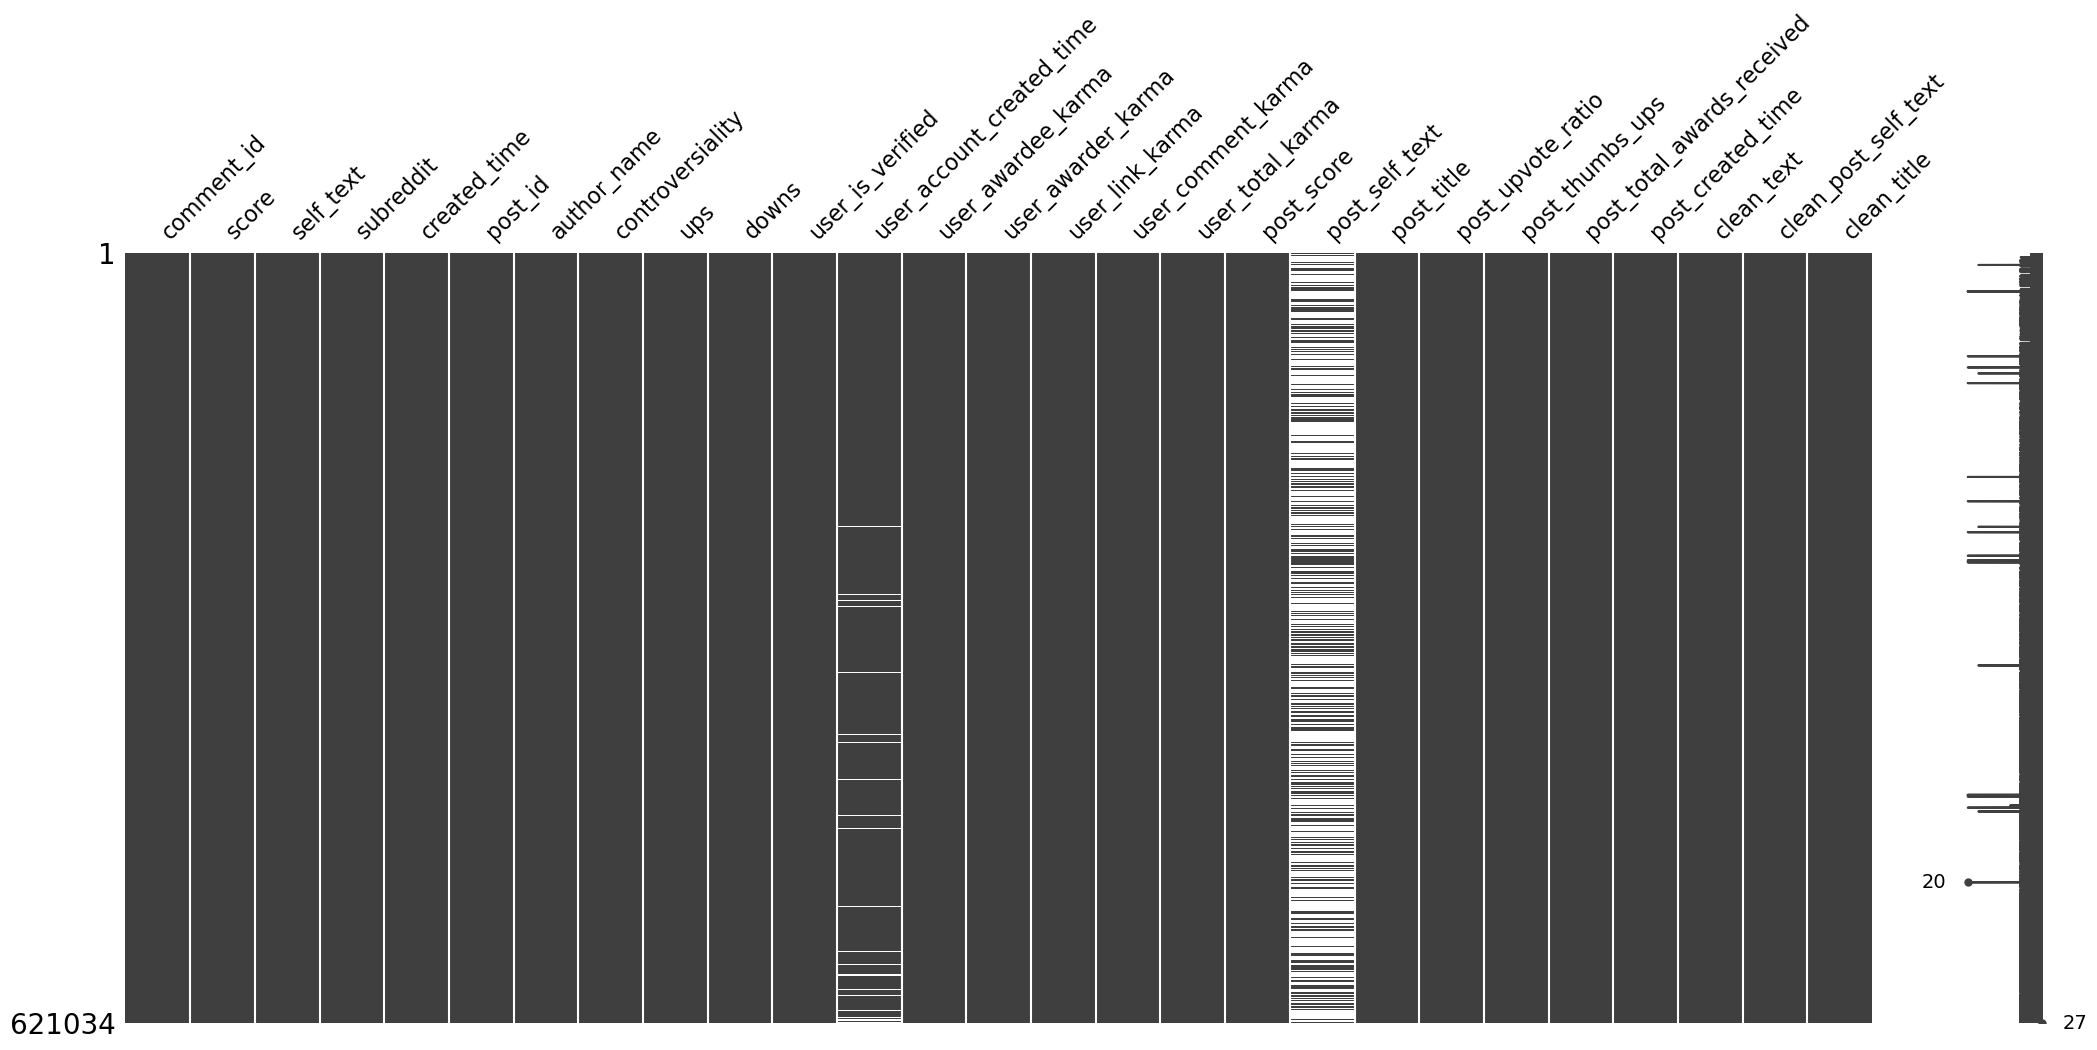

In [18]:
msno.matrix(df)

As we can see most of the null values can be found in the post_self_text column. However we cannot sipmly delete these columns because sometimes posts with no texts might contain a video or image. A better indication for a missing post is an emptty post_title. But as we can see there is no empty post title. 

Another column with some null values is the user_account_created_time column but we won't really use this column for our sentiment analysis. So we don't need to deal with the null values right now.

#### Check for duplicates

In [19]:
print(f"Duplicate Posts: {df[['post_title','post_self_text']].duplicated().sum()}")
print(f'Duplicate Comments: {df[["self_text"]].duplicated().sum()}')
print(f'Duplicate Post Titles: {df[["post_title"]].duplicated().sum()}')
print(df.post_title.count())

Duplicate Posts: 602156
Duplicate Comments: 10195
Duplicate Post Titles: 602304
621034


There seem to many duplicate posts and comments but we cannot delete them, because a lot of the posts are shared and due to the database nature we have a lot of comments belonging to one post (i.e. thus the post title and post_self_text is the same). 

#### Delete Data

For our sentiment and key topic analysis, we will not use user related data. But we want to keep the user data along with posts related data in a seperate data set for further user related analysis. 

So let's create two datasets, one with the user related info (df_complete) and one without (df_posts).

In [20]:
df_complete = df

columns_to_drop = ['author_name','user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma','user_total_karma']
df_posts = df.drop(columns=columns_to_drop)

In [21]:
df_posts.head()

,comment_id,score,self_text,subreddit,created_time,post_id,controversiality,ups,downs,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,clean_text,clean_post_self_text,clean_title
0,lds45dg,1,At no point in the Milankovich cycle should th...,politics,2024-07-18 14:59:21,1e6bs6r,0,1,0,88,NaN,123 House and Senate Republicans deny climate ...,0.93,88,0,2024-07-18 13:43:35,point milankovich cycle earth warm multiple de...,,123 house senate republican deny climate scien...
1,lds42w7,1,"&gt; So, I have to ask: how can Americans crit...",changemyview,2024-07-18 14:58:59,1e6day6,0,1,0,0,"As an African, I've spent quite some time expl...",CMV: The USA has lost its moral high ground in...,0.22,0,0,2024-07-18 14:49:24,ask american criticize african leader politica...,african ive spent quite time exploring various...,cmv usa lost moral high ground criticizing afr...
2,lds3yu1,1,Because they are paid handsomely by fossil fue...,energy,2024-07-18 14:58:22,1e5luu1,0,1,0,1531,Has anyone else watching the convention gotten...,Why does the RNC seem to think we don’t produc...,0.91,1531,0,2024-07-17 16:01:11,paid handsomely fossil fuel interest say thing,anyone else watching convention gotten impress...,rnc seem think dont produce oil gas u anymore
3,lds3y2w,1,"Depends on your house, they want £4k for mine ...",unitedkingdom,2024-07-18 14:58:16,1e6c2xf,0,1,0,4,NaN,Climate body CCC says cut electricity bills to...,0.83,4,0,2024-07-18 13:57:00,depends house want 4k mine grant modern house ...,,climate body ccc say cut electricity bill boos...
4,lds3u4b,1,This is what happens when people face conseque...,climate,2024-07-18 14:57:39,1e5yxqk,0,1,0,527,NaN,Texas residents endure days-long heat wave and...,0.99,527,0,2024-07-18 01:11:19,happens people face consequence blame wrong pe...,,texas resident endure dayslong heat wave power


#### Exploration of time frame of posts 

In [26]:
print("Date of oldest post:", df.post_created_time.min())
print("Date of newest post:", df.post_created_time.max())

Date of oldest post: 2018-05-30 15:22:34
Date of newest post: 2024-07-18 14:49:24


In [27]:
df_posts['year'] = df_posts.post_created_time.dt.year

year
2018      1318
2019      1920
2020       738
2021      2340
2022      7031
2023    189389
2024    418298
Name: post_id, dtype: int64

(array([2017., 2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025.]),
 [Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022'),
  Text(2023.0, 0, '2023'),
  Text(2024.0, 0, '2024'),
  Text(2025.0, 0, '2025')])

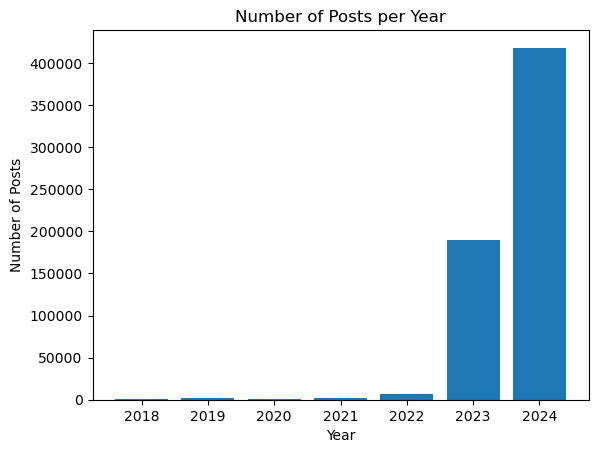

In [28]:
posts_per_year = df_posts.groupby('year')['post_id'].count()
display(posts_per_year)
plt.bar(posts_per_year.index, posts_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Year')
plt.xticks(rotation=0)

Most of the posts have been written in 2023 and 2024. For our sentiment analysis we firstly will work with all years and then look at individual years. Also for our key topics and themes analysis we will use all years and then look into more details at specific years. Maybe there is a link between certain topics being discussed and political events or climate related incidents. 

### Export clean datasets

In [29]:
complete_filename = '../data/df_complete.csv'
posts_filename = '../data/df_posts.csv'

# Function to check and save DataFrame
def check_and_save(df, filename):
    if os.path.exists(filename):
        overwrite = input(f"The file {filename} already exists. Do you want to overwrite it? (yes/no): ")
        if overwrite.lower() != 'yes':
            print(f"The file {filename} was not overwritten.")
            return
    df.to_csv(filename, index=False)
    print(f"The file {filename} has been saved.")

# Check and save both DataFrames
check_and_save(df_complete, complete_filename)
check_and_save(df_posts, posts_filename)

The file ../data/df_complete.csv already exists. Do you want to overwrite it? (yes/no): no
The file ../data/df_complete.csv was not overwritten.
The file ../data/df_posts.csv already exists. Do you want to overwrite it? (yes/no): yes
The file ../data/df_posts.csv has been saved.
